In [1]:
from __future__ import print_function

import tensorflow as tf

from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
%tensorflow_version 1.x
import tensorflow as tf
from sklearn import metrics

from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format


UsageError: Line magic function `%tensorflow_version` not found.


In [2]:
cal_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
cal_housing_dataframe = cal_housing_dataframe.reindex(np.random.permutation(cal_housing_dataframe.index))
cal_housing_dataframe["median_house_value"] /= 1000.0
cal_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15811,-122.41,37.72,32.0,1650.0,316.0,904.0,295.0,4.0583,236.200
12377,-121.54,38.29,47.0,1396.0,254.0,630.0,218.0,2.8616,92.500
15340,-122.29,37.97,20.0,3426.0,632.0,1512.0,580.0,4.4911,227.400
10958,-120.89,37.33,27.0,2692.0,481.0,1518.0,447.0,2.0417,94.200
491,-116.99,33.99,22.0,4227.0,658.0,1849.0,619.0,4.7356,195.900
7681,-118.37,33.82,36.0,2416.0,394.0,1115.0,386.0,6.2560,366.900
11276,-121.12,37.48,5.0,4109.0,820.0,3062.0,713.0,3.2396,125.200
12331,-121.51,38.49,21.0,4426.0,790.0,1856.0,761.0,4.1000,158.300
16934,-124.13,40.79,32.0,2017.0,359.0,855.0,346.0,3.5833,92.800
2094,-117.34,33.21,23.0,2062.0,376.0,1302.0,379.0,4.0109,145.700


In [3]:
cal_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


In [4]:
my_feature = cal_housing_dataframe[['total_rooms']]
feature_columns = [tf.feature_column.numeric_column("total_rooms")]
feature_columns

[_NumericColumn(key='total_rooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [5]:
targets = cal_housing_dataframe["median_house_value"]
targets

15811    236.200
12377     92.500
15340    227.400
10958     94.200
491      195.900
7681     366.900
11276    125.200
12331    158.300
16934     92.800
2094     145.700
2507     175.400
1537     182.100
10745    222.900
2356     154.700
5956     129.700
8665     222.500
474      151.700
5003     218.900
15291    147.900
8223     500.001
5074     137.500
2864     129.200
826      185.500
12657    192.400
5302     336.000
8491     261.300
4952     352.200
14861    273.700
12514     72.500
3207     254.100
          ...   
16594    258.100
1860     500.001
7947     210.500
9786     106.200
9350     167.400
157       32.900
16474    324.700
4365     179.800
11219    263.100
11440    141.100
188      176.400
3305     156.900
7191     500.001
13734    411.200
13823    131.600
12372     74.800
14162    222.000
1849     214.600
2693     248.000
6247     187.500
14054    211.300
9963      83.700
13452    235.600
7893     319.400
4790     235.600
653      243.400
2126     169.700
6831     150.0

In [6]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00001)
optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer, 5.0)

linear_regressor = tf.estimator.LinearRegressor(
    feature_columns= feature_columns,
    optimizer = optimizer)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_task_type': 'worker', '_save_checkpoints_steps': None, '_tf_random_seed': None, '_master': '', '_session_config': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa9b4bdfba8>, '_save_summary_steps': 100, '_num_ps_replicas': 0, '_save_checkpoints_secs': 600, '_service': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_model_dir': '/tmp/tmpnrkdgk60', '_task_id': 0}


In [7]:
def input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    
    features = {key:np.array(value) for key,value in dict(features).items()}
    
    ds = tf.data.Dataset.from_tensor_slices((features, targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    if shuffle: 
        ds = ds.shuffle(buffer_size=10000)
        
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels


In [8]:

_= linear_regressor.train(
    input_fn = lambda:input_fn(my_feature, targets),
    steps = 9000
)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpnrkdgk60/model.ckpt.
INFO:tensorflow:step = 1, loss = 7174.0894
INFO:tensorflow:global_step/sec: 666.964
INFO:tensorflow:step = 101, loss = 45620.71 (0.163 sec)
INFO:tensorflow:global_step/sec: 801.562
INFO:tensorflow:step = 201, loss = 56653.645 (0.118 sec)
INFO:tensorflow:global_step/sec: 853.283
INFO:tensorflow:step = 301, loss = 28503.58 (0.113 sec)
INFO:tensorflow:global_step/sec: 824.777
INFO:tensorflow:step = 401, loss = 192.57407 (0.121 sec)
INFO:tensorflow:global_step/sec: 831.036
INFO:tensorflow:step = 501, loss = 4768.692 (0.120 sec)
INFO:tensorflow:global_step/sec: 764.362
INFO:tensorflow:step = 601, loss = 6377.2734 (0.131 sec)
INFO:tensorflow:global_step/sec: 821.902
INFO:tensorflow:step = 701, loss = 2202.0132 (0.126 sec)
INFO:tensorflow:global_step/sec: 815.378
INFO:tensorflow:step = 801, loss = 42087.098 (0.118 sec)
INFO:tensorflow:global_step/sec: 833.839
INFO:tensorflow:

INFO:tensorflow:global_step/sec: 852.16
INFO:tensorflow:step = 8301, loss = 1278.1553 (0.108 sec)
INFO:tensorflow:global_step/sec: 694.087
INFO:tensorflow:step = 8401, loss = 3080.3635 (0.144 sec)
INFO:tensorflow:global_step/sec: 932.041
INFO:tensorflow:step = 8501, loss = 12613.192 (0.107 sec)
INFO:tensorflow:global_step/sec: 735.307
INFO:tensorflow:step = 8601, loss = 1117.9082 (0.137 sec)
INFO:tensorflow:global_step/sec: 929.399
INFO:tensorflow:step = 8701, loss = 45366.426 (0.110 sec)
INFO:tensorflow:global_step/sec: 820.734
INFO:tensorflow:step = 8801, loss = 16742.182 (0.119 sec)
INFO:tensorflow:global_step/sec: 917.125
INFO:tensorflow:step = 8901, loss = 821.4675 (0.116 sec)
INFO:tensorflow:Saving checkpoints for 9000 into /tmp/tmpnrkdgk60/model.ckpt.
INFO:tensorflow:Loss for final step: 59870.516.


In [17]:
from sklearn.metrics import mean_squared_error

import math
prediction_input_fn = lambda: input_fn(my_feature, targets, num_epochs = 1, shuffle = False)
predictions = linear_regressor.predict(input_fn=prediction_input_fn)
predictions = np.array([item['predictions'][0] for item in predictions])

mean_squared_error = metrics.mean_squared_error(predictions, targets)
root_mean_squared_error = math.sqrt(mean_squared_error)

print("Mean Squared Error (on training data): %0.3f" % mean_squared_error)
print("Root Mean Squared Error (on training data): %0.3f" % root_mean_squared_error)


INFO:tensorflow:Restoring parameters from /tmp/tmpnrkdgk60/model.ckpt-9000
Mean Squared Error (on training data): 42792.088
Root Mean Squared Error (on training data): 206.862


In [22]:
min_house_value = cal_housing_dataframe["median_house_value"].min()
max_house_value = cal_housing_dataframe["median_house_value"].max()

max_min_difference = max_house_value - min_house_value

print("Min. Median House Value: %0.3f" % min_house_value)
print("Max. Median House Value: %0.3f" % max_house_value)
print("Difference between Min. and Max.: %0.3f" % max_min_difference)
print("Root Mean Squared Error: %0.3f" % root_mean_squared_error)


Min. Median House Value: 14.999
Max. Median House Value: 500.001
Difference between Min. and Max.: 485.002
Root Mean Squared Error: 206.862


In [26]:
calibration_data = pd.DataFrame()
calibration_data['prediction'] = pd.Series(predictions)
calibration_data['targets'] = pd.Series(targets)
calibration_data.describe()

,prediction,targets
count,17000.000000,17000.000000
mean,225.768478,207.300912
std,186.166931,115.983764
min,0.171004,14.999000
25%,124.854637,119.400000
50%,181.645462,180.400000
75%,269.116165,265.000000
max,3239.810547,500.001000


In [29]:
sample = cal_housing_dataframe.sample(300)
sample

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16566,-122.69,38.44,40.0,1449.0,281.0,636.0,295.0,2.7222,161.200
13910,-122.03,37.61,37.0,1383.0,259.0,808.0,241.0,4.0125,161.400
13285,-121.92,40.52,13.0,4581.0,881.0,1799.0,734.0,2.2993,99.500
11867,-121.35,38.65,20.0,2498.0,546.0,1185.0,506.0,3.2243,107.900
15705,-122.39,37.73,46.0,1517.0,299.0,879.0,309.0,2.2222,195.100
8343,-118.46,34.16,38.0,1495.0,300.0,598.0,280.0,3.4698,265.400
3167,-117.84,33.84,23.0,6157.0,1129.0,2817.0,1073.0,5.0629,232.600
1150,-117.12,32.71,33.0,1256.0,331.0,1315.0,321.0,1.9286,78.500
14591,-122.16,37.70,36.0,1097.0,208.0,568.0,225.0,2.9917,194.600
10980,-120.92,37.60,12.0,4485.0,805.0,2445.0,832.0,3.7611,123.100


In [30]:
x_0 = sample["total_rooms"].min()
x_1 = sample["total_rooms"].max()

In [31]:
weight = linear_regressor.get_variable_value('linear/linear_model/total_rooms/weights')[0]
bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

In [32]:
y_0 = weight*x_0 + bias
y_1 = weight*x_1 + bias

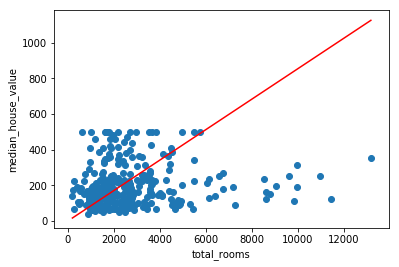

In [37]:
plt.plot([x_0, x_1], [y_0, y_1], c='r')
plt.ylabel("median_house_value")
plt.xlabel("total_rooms")
plt.scatter(sample["total_rooms"], sample["median_house_value"])
plt.show()

In [40]:
def train_model(learning_rate, steps, batch_size, input_feature="total_rooms"):
  """Trains a linear regression model of one feature.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    input_feature: A `string` specifying a column from `california_housing_dataframe`
      to use as input feature.
  """
  
  periods = 10
  steps_per_period = steps / periods

  my_feature = input_feature
  my_feature_data = cal_housing_dataframe[[my_feature]]
  my_label = "median_house_value"
  targets = cal_housing_dataframe[my_label]

  # Create feature columns.
  feature_columns = [tf.feature_column.numeric_column(my_feature)]
  
  # Create input functions.
  training_input_fn = lambda:input_fn(my_feature_data, targets, batch_size=batch_size)
  prediction_input_fn = lambda: input_fn(my_feature_data, targets, num_epochs=1, shuffle=False)
  
  # Create a linear regressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=feature_columns,
      optimizer=my_optimizer
  )

  # Set up to plot the state of our model's line each period.
  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.title("Learned Line by Period")
  plt.ylabel(my_label)
  plt.xlabel(my_feature)
  sample = cal_housing_dataframe.sample(n=300)
  plt.scatter(sample[my_feature], sample[my_label])
  colors = [cm.coolwarm(x) for x in np.linspace(-1, 1, periods)]

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  root_mean_squared_errors = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    # Take a break and compute predictions.
    predictions = linear_regressor.predict(input_fn=prediction_input_fn)
    predictions = np.array([item['predictions'][0] for item in predictions])
    
    # Compute loss.
    root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(predictions, targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    root_mean_squared_errors.append(root_mean_squared_error)
    # Finally, track the weights and biases over time.
    # Apply some math to ensure that the data and line are plotted neatly.
    y_extents = np.array([0, sample[my_label].max()])
    
    weight = linear_regressor.get_variable_value('linear/linear_model/%s/weights' % input_feature)[0]
    bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

    x_extents = (y_extents - bias) / weight
    x_extents = np.maximum(np.minimum(x_extents,
                                      sample[my_feature].max()),
                           sample[my_feature].min())
    y_extents = weight * x_extents + bias
    plt.plot(x_extents, y_extents, color=colors[period]) 
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.subplot(1, 2, 2)
  plt.ylabel('RMSE')
  plt.xlabel('Periods')
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(root_mean_squared_errors)

  # Output a table with calibration data.
  calibration_data = pd.DataFrame()
  calibration_data["predictions"] = pd.Series(predictions)
  calibration_data["targets"] = pd.Series(targets)
  display.display(calibration_data.describe())

  print("Final RMSE (on training data): %0.2f" % root_mean_squared_error)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_task_type': 'worker', '_save_checkpoints_steps': None, '_tf_random_seed': None, '_master': '', '_session_config': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa9ad9322b0>, '_save_summary_steps': 100, '_num_ps_replicas': 0, '_save_checkpoints_secs': 600, '_service': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_model_dir': '/tmp/tmphhe7h9il', '_task_id': 0}
Training model...
RMSE (on training data):
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmphhe7h9il/model.ckpt.
INFO:tensorflow:step = 1, loss = 190908.31
INFO:tensorflow:Saving checkpoints for 60 into /tmp/tmphhe7h9il/model.ckpt.
INFO:tensorflow:Loss for final step: 190772.22.
INFO:tensorflow:Restoring parameters from /tmp/tmphhe7h9il/model.ckpt-60
  period 00 : 223.3

,predictions,targets
count,17000.000000,17000.000000
mean,132.713867,207.300912
std,109.434883,115.983764
min,0.100446,14.999000
25%,73.393478,119.400000
50%,106.776955,180.400000
75%,158.195030,265.000000
max,1904.464233,500.001000


Final RMSE (on training data): 166.33


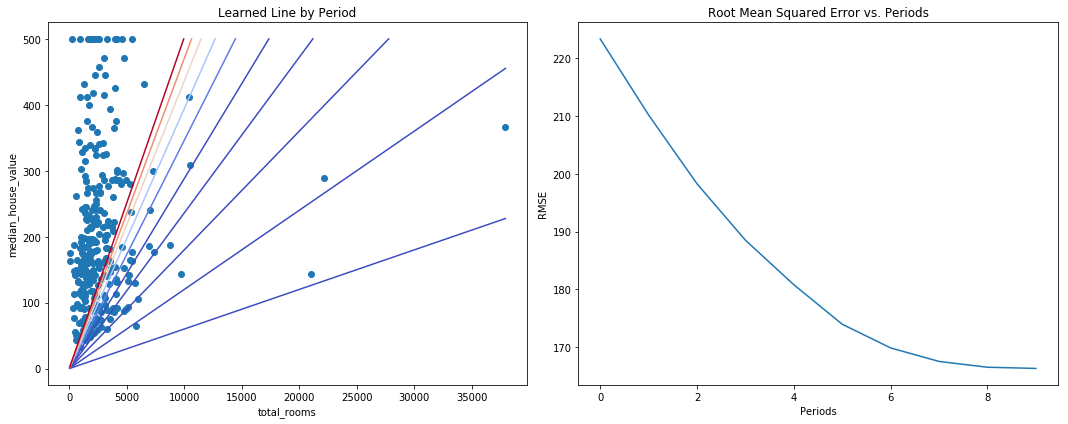

In [46]:

from IPython import display
train_model(
    learning_rate=0.00002,
    steps=600,
    batch_size=6
)